In [ ]:
# -----------------------------------------------
# Compare Masks Registered to a Single Template
# -----------------------------------------------
# This notebook compares the area and COM stats
# of aligned masks (30 frames) against a single
# template, and visualizes the shrinkage or shift.

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import center_of_mass
from PIL import Image as PILImage
from IPython.display import display

# ---------- Configurations ----------
input_path = r"P:/Projects/DeepFlow/deepFlowDocker/scripts/Registration/data/20213_2_0_masked.npy"
aligned_path = r"P:/Projects/DeepFlow/deepFlowDocker/scripts/Registration/output/1simNonrigid/old/20213_2_0_masked_aligned_velocity.npy"
single_template_path = r"P:/Projects/DeepFlow/deepFlowDocker/scripts/Registration/templates/Template1simNonrigid/final_template_similarity_1.npy"

output_dir = r"P:/Projects/DeepFlow/deepFlowDocker/scripts/Registration/notebooks/analysis_output/"
os.makedirs(output_dir, exist_ok=True)
save_table_path = os.path.join(output_dir, "alignment_table_single_template.csv")
save_image_path = os.path.join(output_dir, "alignment_summary_single_template.png")
save_all_img_path = os.path.join(output_dir, "all_frames_single_template_comparison.png")

# ---------- Load Data ----------
def load_binary_masks(file_path, threshold=1e-6):
    data = np.load(file_path)
    return (np.abs(data) > threshold).astype(np.uint8)

binary_mask = load_binary_masks(input_path)
aligned_mask = load_binary_masks(aligned_path)
template = np.load(single_template_path)
template = (template > 0.5).astype(np.uint8)

# ---------- Compute Metrics ----------
def compute_stats(mask):
    area = int(np.sum(mask))
    com_y, com_x = center_of_mass(mask) if area > 0 else (np.nan, np.nan)
    return area, com_y, com_x

rows = []
for i in range(30):
    a_t, cy_t, cx_t = compute_stats(template)
    a_i, cy_i, cx_i = compute_stats(binary_mask[i])
    a_a, cy_a, cx_a = compute_stats(aligned_mask[i])

    rows.append({
        'Frame': i,
        'Area_template': a_t,
        'COM_template_y': cy_t,
        'COM_template_x': cx_t,
        'Area_input': a_i,
        'COM_input_y': cy_i,
        'COM_input_x': cx_i,
        'Delta_A': a_i - a_t,
        'Delta_COM_y': cy_i - cy_t,
        'Delta_COM_x': cx_i - cx_t,
        'Area_aligned': a_a,
        'COM_aligned_y': cy_a,
        'COM_aligned_x': cx_a,
        'Delta_A_after': a_a - a_t,
        'Delta_COM_y_after': cy_a - cy_t,
        'Delta_COM_x_after': cx_a - cx_t,
    })

# ---------- Save Table ----------
df = pd.DataFrame(rows)
df.round(2).to_csv(save_table_path, index=False)
print("Saved table to:", save_table_path)

# ---------- Plot Summary ----------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(df['Frame'], df['Delta_A_after'], marker='o')
axes[0, 0].set_title('ΔArea After Registration')

axes[0, 1].plot(df['Frame'], df['Delta_COM_y_after'], marker='o', label='y')
axes[0, 1].plot(df['Frame'], df['Delta_COM_x_after'], marker='o', label='x')
axes[0, 1].set_title('ΔCOM After Registration')
axes[0, 1].legend()

axes[1, 0].plot(df['Frame'], df['Area_input'], label='Input', linestyle='--')
axes[1, 0].plot(df['Frame'], df['Area_aligned'], label='Aligned')
axes[1, 0].plot(df['Frame'], df['Area_template'], label='Template', linestyle=':')
axes[1, 0].set_title('Area Comparison')
axes[1, 0].legend()

axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig(save_image_path)
print("Saved summary plot to:", save_image_path)
plt.show()

# ---------- Visualize All Frames ----------
fig, axes = plt.subplots(30, 3, figsize=(12, 60))
for i in range(30):
    axes[i, 0].imshow(binary_mask[i], cmap='gray')
    axes[i, 0].set_title(f"Input [{i}]", fontsize=8)
    axes[i, 0].axis('off')

    axes[i, 1].imshow(template, cmap='gray')
    axes[i, 1].set_title(f"Template", fontsize=8)
    axes[i, 1].axis('off')

    axes[i, 2].imshow(aligned_mask[i], cmap='gray')
    axes[i, 2].set_title(f"Aligned [{i}]", fontsize=8)
    axes[i, 2].axis('off')

plt.tight_layout()
plt.savefig(save_all_img_path, dpi=300)
print("Saved all frames comparison image to:", save_all_img_path)
plt.close()

# ---------- Show Inline in Notebook ----------
display(df.round(2))
img = PILImage.open(save_all_img_path)
plt.figure(figsize=(12, 80))
plt.imshow(img)
plt.axis('off')
plt.title("Input vs. Template vs. Aligned (30 Frames)", fontsize=14)
plt.show()

Saved table to: P:/Projects/DeepFlow/deepFlowDocker/scripts/Registration/notebooks/analysis_output\alignment_table_single_template.csv
Saved summary plot to: P:/Projects/DeepFlow/deepFlowDocker/scripts/Registration/notebooks/analysis_output\alignment_summary_single_template.png


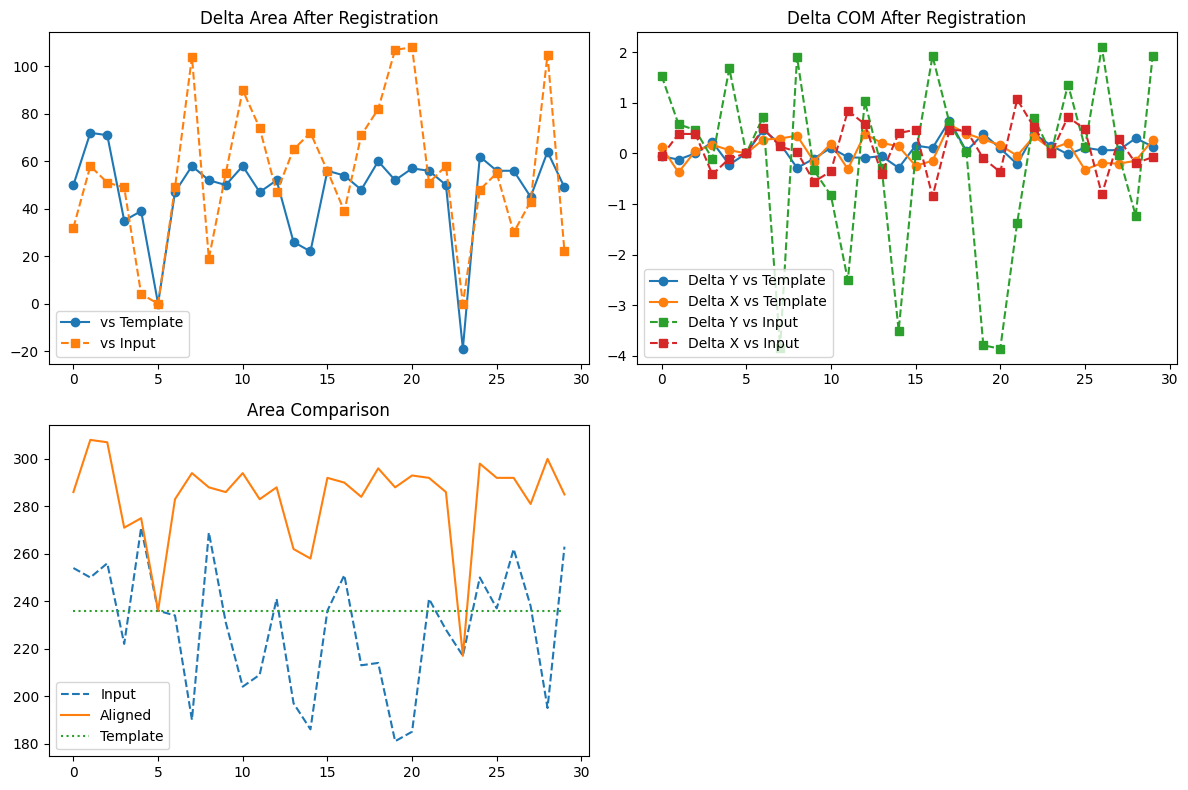

Saved all frames comparison image to: P:/Projects/DeepFlow/deepFlowDocker/scripts/Registration/notebooks/analysis_output\all_frames_single_template_comparison.png


,Frame,Area_template,COM_template_y,COM_template_x,Area_input,COM_input_y,COM_input_x,Delta_A,Delta_COM_y,Delta_COM_x,Area_aligned,COM_aligned_y,COM_aligned_x,Delta_A_after,Delta_COM_y_after,Delta_COM_x_after,Delta_A_input_aligned,Delta_COM_y_input_aligned,Delta_COM_x_input_aligned
0,0,236,89.41,68.06,254,87.82,68.24,18,-1.59,0.18,286,89.36,68.19,50,-0.05,0.13,32,1.53,-0.06
1,1,236,89.41,68.06,250,88.71,67.30,14,-0.70,-0.76,308,89.29,67.69,72,-0.12,-0.37,58,0.58,0.39
2,2,236,89.41,68.06,256,88.95,67.73,20,-0.46,-0.33,307,89.41,68.11,71,0.00,0.05,51,0.46,0.38
3,3,236,89.41,68.06,222,89.74,68.64,-14,0.33,0.58,271,89.63,68.23,35,0.22,0.17,49,-0.11,-0.42
4,4,236,89.41,68.06,271,87.51,68.23,35,-1.90,0.17,275,89.19,68.12,39,-0.22,0.06,4,1.68,-0.10
5,5,236,89.41,68.06,236,89.41,68.06,0,0.00,0.00,236,89.41,68.06,0,0.00,0.00,0,0.00,0.00
6,6,236,89.41,68.06,234,89.15,67.83,-2,-0.26,-0.23,283,89.88,68.33,47,0.47,0.27,49,0.73,0.50
7,7,236,89.41,68.06,190,93.44,68.22,-46,4.03,0.16,294,89.60,68.35,58,0.19,0.29,104,-3.84,0.14
8,8,236,89.41,68.06,269,87.22,68.38,33,-2.19,0.32,288,89.12,68.41,52,-0.29,0.35,19,1.91,0.03
9,9,236,89.41,68.06,231,89.65,68.46,-5,0.23,0.40,286,89.31,67.90,50,-0.10,-0.16,55,-0.34,-0.56


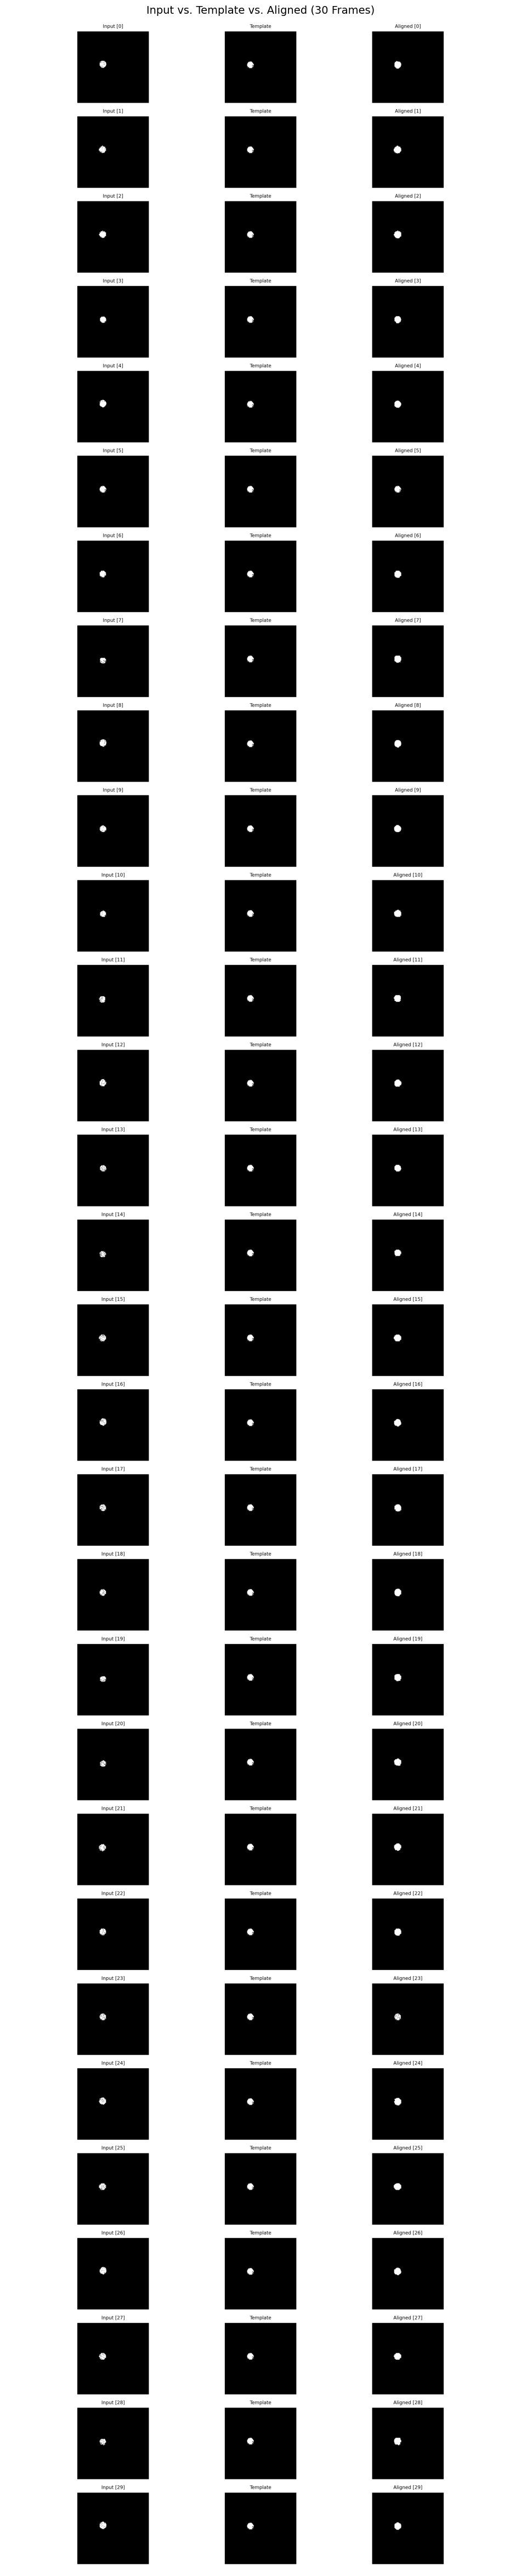

In [12]:
# -----------------------------------------------
# Compare Masks Registered to a Single Template
# -----------------------------------------------
# This notebook compares the area and COM stats
# of aligned masks (30 frames) against a single
# template, and visualizes the shrinkage or shift.

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import center_of_mass
from PIL import Image as PILImage
from IPython.display import display

# ---------- Configurations ----------
input_path = r"P:/Projects/DeepFlow/deepFlowDocker/scripts/Registration/data/20213_2_0_masked.npy"
aligned_path = r"P:/Projects/DeepFlow/deepFlowDocker/scripts/Registration/output/1simNonrigid/old/20213_2_0_masked_aligned_velocity.npy"
single_template_path = r"P:/Projects/DeepFlow/deepFlowDocker/scripts/Registration/templates/Template1simNonrigid/final_template_similarity_1.npy"

output_dir = r"P:/Projects/DeepFlow/deepFlowDocker/scripts/Registration/notebooks/analysis_output"
os.makedirs(output_dir, exist_ok=True)
save_table_path = os.path.join(output_dir, "alignment_table_single_template.csv")
save_image_path = os.path.join(output_dir, "alignment_summary_single_template.png")
save_all_img_path = os.path.join(output_dir, "all_frames_single_template_comparison.png")

# ---------- Load Data ----------
def load_binary_masks(file_path, threshold=1e-6):
    data = np.load(file_path)
    return (np.abs(data) > threshold).astype(np.uint8)

binary_mask = load_binary_masks(input_path)
aligned_mask = load_binary_masks(aligned_path)
template = np.load(single_template_path)
template = (template > 0.5).astype(np.uint8)

# ---------- Compute Metrics ----------
def compute_stats(mask):
    area = int(np.sum(mask))
    com_y, com_x = center_of_mass(mask) if area > 0 else (np.nan, np.nan)
    return area, com_y, com_x

rows = []
for i in range(30):
    a_t, cy_t, cx_t = compute_stats(template)
    a_i, cy_i, cx_i = compute_stats(binary_mask[i])
    a_a, cy_a, cx_a = compute_stats(aligned_mask[i])

    rows.append({
        'Frame': i,
        'Area_template': a_t,
        'COM_template_y': cy_t,
        'COM_template_x': cx_t,
        'Area_input': a_i,
        'COM_input_y': cy_i,
        'COM_input_x': cx_i,
        'Delta_A': a_i - a_t,
        'Delta_COM_y': cy_i - cy_t,
        'Delta_COM_x': cx_i - cx_t,
        'Area_aligned': a_a,
        'COM_aligned_y': cy_a,
        'COM_aligned_x': cx_a,
        'Delta_A_after': a_a - a_t,
        'Delta_COM_y_after': cy_a - cy_t,
        'Delta_COM_x_after': cx_a - cx_t,
        'Delta_A_input_aligned': a_a - a_i,
        'Delta_COM_y_input_aligned': cy_a - cy_i,
        'Delta_COM_x_input_aligned': cx_a - cx_i,
    })

# ---------- Save Table ----------
df = pd.DataFrame(rows)
df.round(2).to_csv(save_table_path, index=False)
print("Saved table to:", save_table_path)

# ---------- Plot Summary ----------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(df['Frame'], df['Delta_A_after'], marker='o', label='vs Template')
axes[0, 0].plot(df['Frame'], df['Delta_A_input_aligned'], marker='s', label='vs Input', linestyle='--')
axes[0, 0].set_title('Delta Area After Registration')
axes[0, 0].legend()

axes[0, 1].plot(df['Frame'], df['Delta_COM_y_after'], marker='o', label='Delta Y vs Template')
axes[0, 1].plot(df['Frame'], df['Delta_COM_x_after'], marker='o', label='Delta X vs Template')
axes[0, 1].plot(df['Frame'], df['Delta_COM_y_input_aligned'], marker='s', label='Delta Y vs Input', linestyle='--')
axes[0, 1].plot(df['Frame'], df['Delta_COM_x_input_aligned'], marker='s', label='Delta X vs Input', linestyle='--')
axes[0, 1].set_title('Delta COM After Registration')
axes[0, 1].legend()

axes[1, 0].plot(df['Frame'], df['Area_input'], label='Input', linestyle='--')
axes[1, 0].plot(df['Frame'], df['Area_aligned'], label='Aligned')
axes[1, 0].plot(df['Frame'], df['Area_template'], label='Template', linestyle=':')
axes[1, 0].set_title('Area Comparison')
axes[1, 0].legend()

axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig(save_image_path)
print("Saved summary plot to:", save_image_path)
plt.show()

# ---------- Visualize All Frames ----------
fig, axes = plt.subplots(30, 3, figsize=(12, 60))
for i in range(30):
    axes[i, 0].imshow(binary_mask[i], cmap='gray')
    axes[i, 0].set_title(f"Input [{i}]", fontsize=8)
    axes[i, 0].axis('off')

    axes[i, 1].imshow(template, cmap='gray')
    axes[i, 1].set_title("Template", fontsize=8)
    axes[i, 1].axis('off')

    axes[i, 2].imshow(aligned_mask[i], cmap='gray')
    axes[i, 2].set_title(f"Aligned [{i}]", fontsize=8)
    axes[i, 2].axis('off')

plt.tight_layout()
plt.savefig(save_all_img_path, dpi=300)
print("Saved all frames comparison image to:", save_all_img_path)
plt.close()

# ---------- Show Inline in Notebook ----------
display(df.round(2))
img = PILImage.open(save_all_img_path)
plt.figure(figsize=(12, 80))
plt.imshow(img)
plt.axis('off')
plt.title("Input vs. Template vs. Aligned (30 Frames)", fontsize=14)
plt.show()
